In [145]:
%load_ext autoreload
%autoreload 2


from util import *
#from genetic_algorithm import genetic_algorithm
from genetic_al import genetic_algorithm
#from adding import initialize_population
#from first_version_simple import algorithm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:

problem_file = 'STAGE1_1.json'
# problem_file = "TEST_K50_1.json"
timelimit = 30

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
     #solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
    solution = genetic_algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, 50, 100, crossover_rate=0.8, mutation_rate=0.05, elite_size=2, timelimit=60)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

rider's available_number : Rider([BIKE, 5.291005291005291, 100, 60, 8000, 120, 20])
rider's available_number : Rider([CAR, 4.2328042328042335, 200, 100, 6000, 180, 100])
Initial best obj = 5062.676
rider's available_number : Rider([BIKE, 5.291005291005291, 100, 60, 8000, 120, 20])
rider's available_number : Rider([CAR, 4.2328042328042335, 200, 100, 6000, 180, 100])
Initial best obj = 5046.088000000001
rider's available_number : Rider([BIKE, 5.291005291005291, 100, 60, 8000, 120, 20])
rider's available_number : Rider([WALK, 1.3227513227513228, 70, 30, 8000, 120, 30])
rider's available_number : Rider([CAR, 4.2328042328042335, 200, 100, 6000, 180, 100])
Initial best obj = 5177.778
rider's available_number : Rider([BIKE, 5.291005291005291, 100, 60, 8000, 120, 20])
rider's available_number : Rider([WALK, 1.3227513227513228, 70, 30, 8000, 120, 30])
rider's available_number : Rider([CAR, 4.2328042328042335, 200, 100, 6000, 180, 100])
Initial best obj = 5076.27
rider's available_number : Rider

{'feasible': False,
 'infeasibility': 'Solution must be a list of bundle information!',
 'bundles': None,
 'time': 0.32232069969177246,
 'timelimit_exception': False,
 'exception': "'list' object has no attribute 'available_number'",
 'prob_name': 'STAGE1_1',
 'prob_file': 'STAGE1_1.json'}

TypeError: 'NoneType' object is not iterable

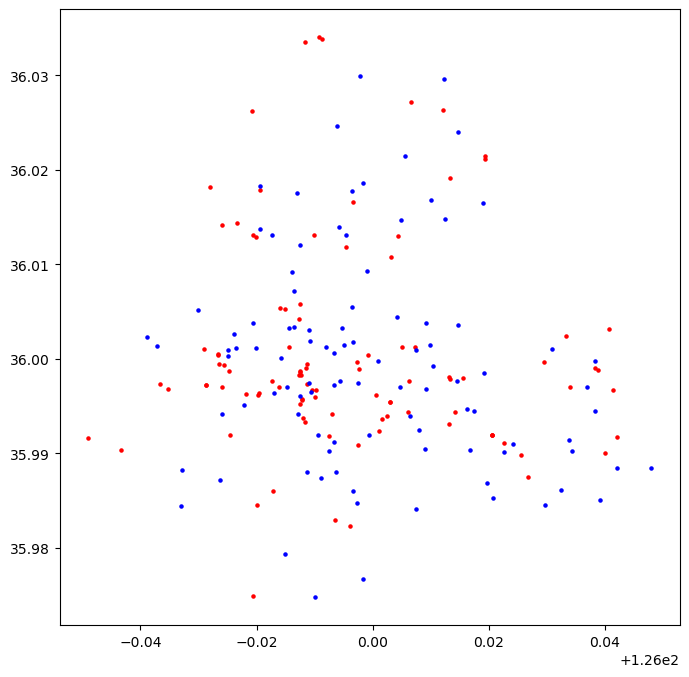

In [147]:
draw_route_solution(ALL_ORDERS, checked_solution)

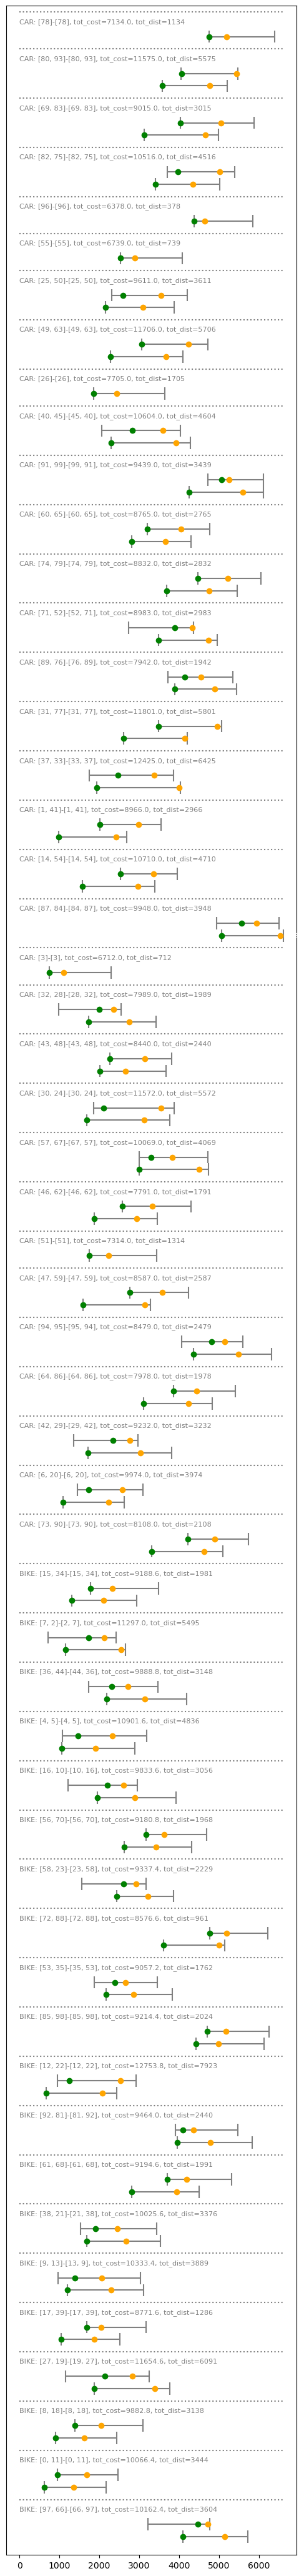

In [ ]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)